<img src="https://raw.githubusercontent.com/UXARRAY/uxarray/main/docs/_static/images/logos/uxarray_logo_h_dark.svg"
     width="30%"
     alt="UXarray logo"
     align="right"
/>

# MPAS Atmosphere 

This recipe demonstrates how to create visualizations using 30km MPAS Atmosphere model output. We'll explore techniques for visualizing atmospheric variables on both the primal and dual MPAS grids, focusing on relative humidity and vorticity at the 200hPa pressure level.

## Visualization Objectives

This recipe will guide you through:

* Creating polygon plots using the MPAS primal grid to visualize relative humidity at 200hPa
* Developing polygon plots using the MPAS dual grid to visualize vorticity at 200hPa
* Understanding the differences between primal and dual grid visualizations in MPAS

-----

In [1]:
import uxarray as ux
import cartopy.crs as ccrs

## Relative Humidity

For visualizing relative humidity, we use the Primal MPAS grid, which is composed of hexagons.

In [ ]:
grid_path = "../../meshfiles/x1.655362.grid.nc"
data_path = "../../meshfiles/x1.655362.data.nc"

uxds_primal = ux.open_dataset(grid_path, data_path)
uxds_primal

:Overlay
   .Image.I     :Image   [Longitude,Latitude]   (Longitude_Latitude relhum_200hPa)
   .Coastline.I :Feature   [Longitude,Latitude]
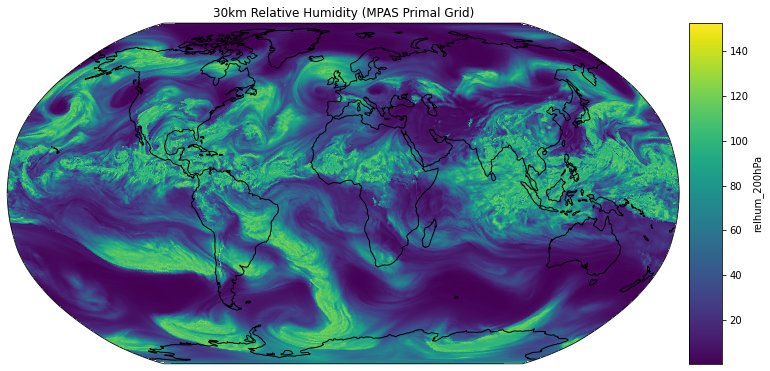

In [33]:
uxds_primal['relhum_200hPa'][0].plot(projection=ccrs.Robinson(), backend='matplotlib', pixel_ratio=4.0, features=['coastline'], width=1000, height=500, cmap='viridis', title="30km Relative Humidity (MPAS Primal Grid)")

## Vorticity

For visualizing relative humidity, we use the Dual MPAS grid, which is composed of triangles.

In [35]:
grid_path = "../../meshfiles/x1.655362.grid.nc"
data_path = "../../meshfiles/x1.655362.data.nc"

uxds_dual = ux.open_dataset(grid_path, data_path, use_dual=True)
uxds_dual['vorticity_200hPa']

<xarray.UxDataArray 'vorticity_200hPa' (Time: 1, n_face: 1310720)> Size: 5MB
[1310720 values with dtype=float32]
Dimensions without coordinates: Time, n_face
Attributes:
    units:      s^{-1}
    long_name:  Relative vorticity vertically interpolated to 200 hPa

:Overlay
   .Image.I     :Image   [Longitude,Latitude]   (Longitude_Latitude vorticity_200hPa)
   .Coastline.I :Feature   [Longitude,Latitude]
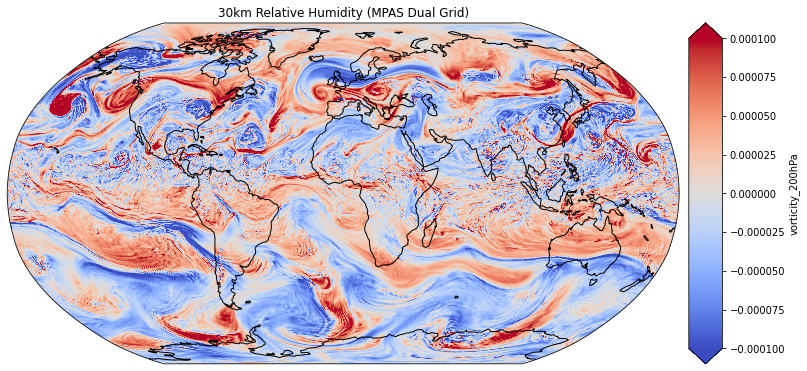

In [42]:
uxds_dual['vorticity_200hPa'][0].plot(projection=ccrs.Robinson(), rasterize=True, backend='matplotlib', pixel_ratio=4.0, features=['coastline'], width=1000, height=500, cmap='coolwarm', title="30km Vorticity (MPAS Dual Grid)", clim=(-0.0001,0.0001))

## MPAS Dual & Primal Grids

The Model for Prediction Across Scales (MPAS) utilizes two complementary grid structures for atmospheric modeling: the primal grid and the dual grid. The primal grid consists of hexagonal cells that form the primary computational mesh, while the dual grid is composed of triangular cells that connect the centers of the primary hexagons.

In the primal grid structure, scalar quantities like relative humidity are naturally represented at the centers of the hexagonal cells. The dual grid, with its triangular elements, is particularly well-suited for vector quantities and derived fields such as vorticity..

Below, we visualize both grid structures to illustrate their complementary nature. 

:Layout
   .Path.I  :Path   [Longitude,Latitude]
   .Path.II :Path   [Longitude,Latitude]
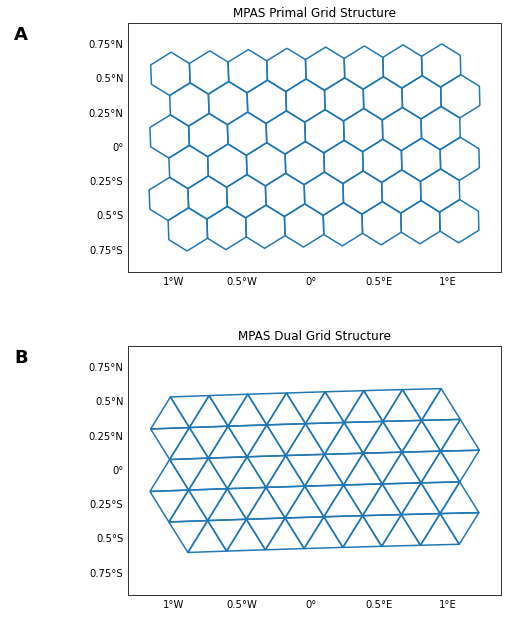

In [72]:
(uxds_primal.uxgrid.subset.bounding_box(lon_bounds = (-1, 1), lat_bounds=(-0.5, 0.5)).plot(title="MPAS Primal Grid Structure", ) + 
 uxds_dual.uxgrid.subset.bounding_box(lon_bounds = (-1, 1), lat_bounds=(-0.5, 0.5)).plot(title="MPAS Dual Grid Structure")).cols(1).opts(fig_size=200)

The visualization below demonstrates the intricate geometric relationship between MPAS primal and dual grids. By overlaying both grid structures, we can observe how the vertices of each hexagonal cell in the primal grid serve as the cell centers for the triangular elements of the dual grid. Conversely, the vertices of the triangular cells in the dual grid correspond to the centers of the hexagonal cells in the primal grid.

:Overlay
   .Path.I  :Path   [Longitude,Latitude]
   .Path.II :Path   [Longitude,Latitude]
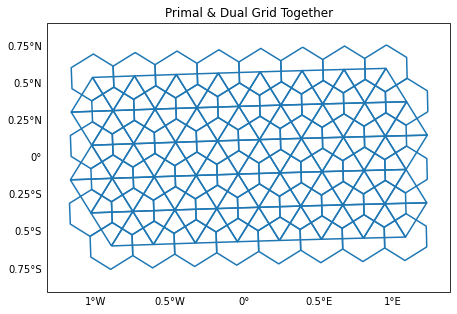

In [73]:
(uxds_primal.uxgrid.subset.bounding_box(lon_bounds = (-1, 1), lat_bounds=(-0.5, 0.5)).plot() * 
 uxds_dual.uxgrid.subset.bounding_box(lon_bounds = (-1, 1), lat_bounds=(-0.5, 0.5)).plot()).opts(fig_size=200, title="Primal & Dual Grid Together")